In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [385]:
# Read CSV file
data = pd.read_csv('GlassIdentification.csv', sep=',', header=None, names=['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'])

In [386]:
# Check datatypes
data.dtypes

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [387]:
# Check dataset dimensions
print(data.shape)

(214, 11)


In [388]:
# Check column names
data.columns

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [389]:
# Print dataset
data.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [390]:
# Summary of dataset
print("Number of rows: " + str(data.shape[0]))
print("Number of columns: " + str(data.shape[1]))
print("Column names: ")

Number of rows: 214
Number of columns: 11
Column names: 


In [391]:
# Statistical information of the dataset
data.describe(include = 'all')

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [392]:
# Count of Type_of_glass
data['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='Type_of_glass', ylabel='count'>

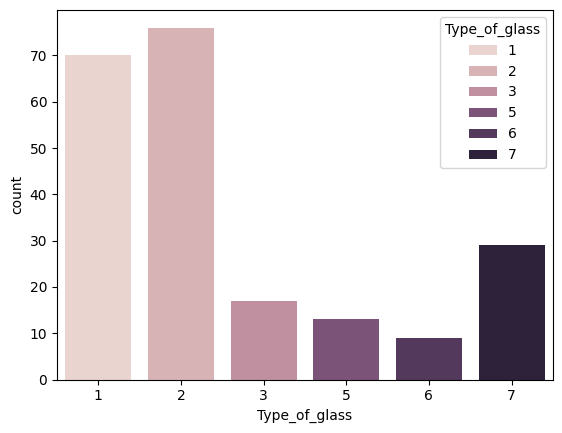

In [393]:
# Count Plot
sns.countplot(data, x = 'Type_of_glass', hue = 'Type_of_glass')

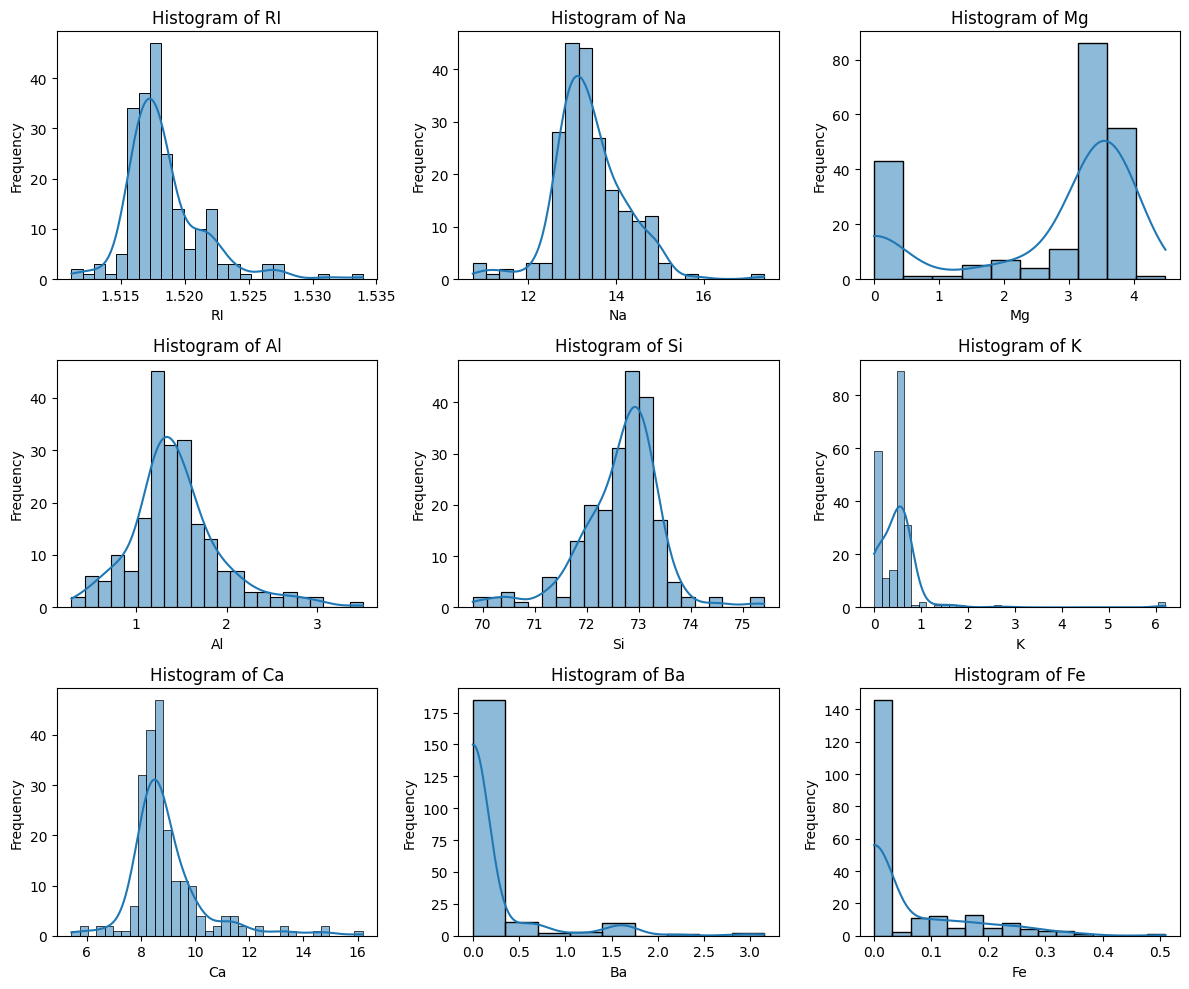

In [394]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Histograms for numerical columns
for i, col in enumerate(cols):
    sns.histplot(data[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Histogram of {col}')
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

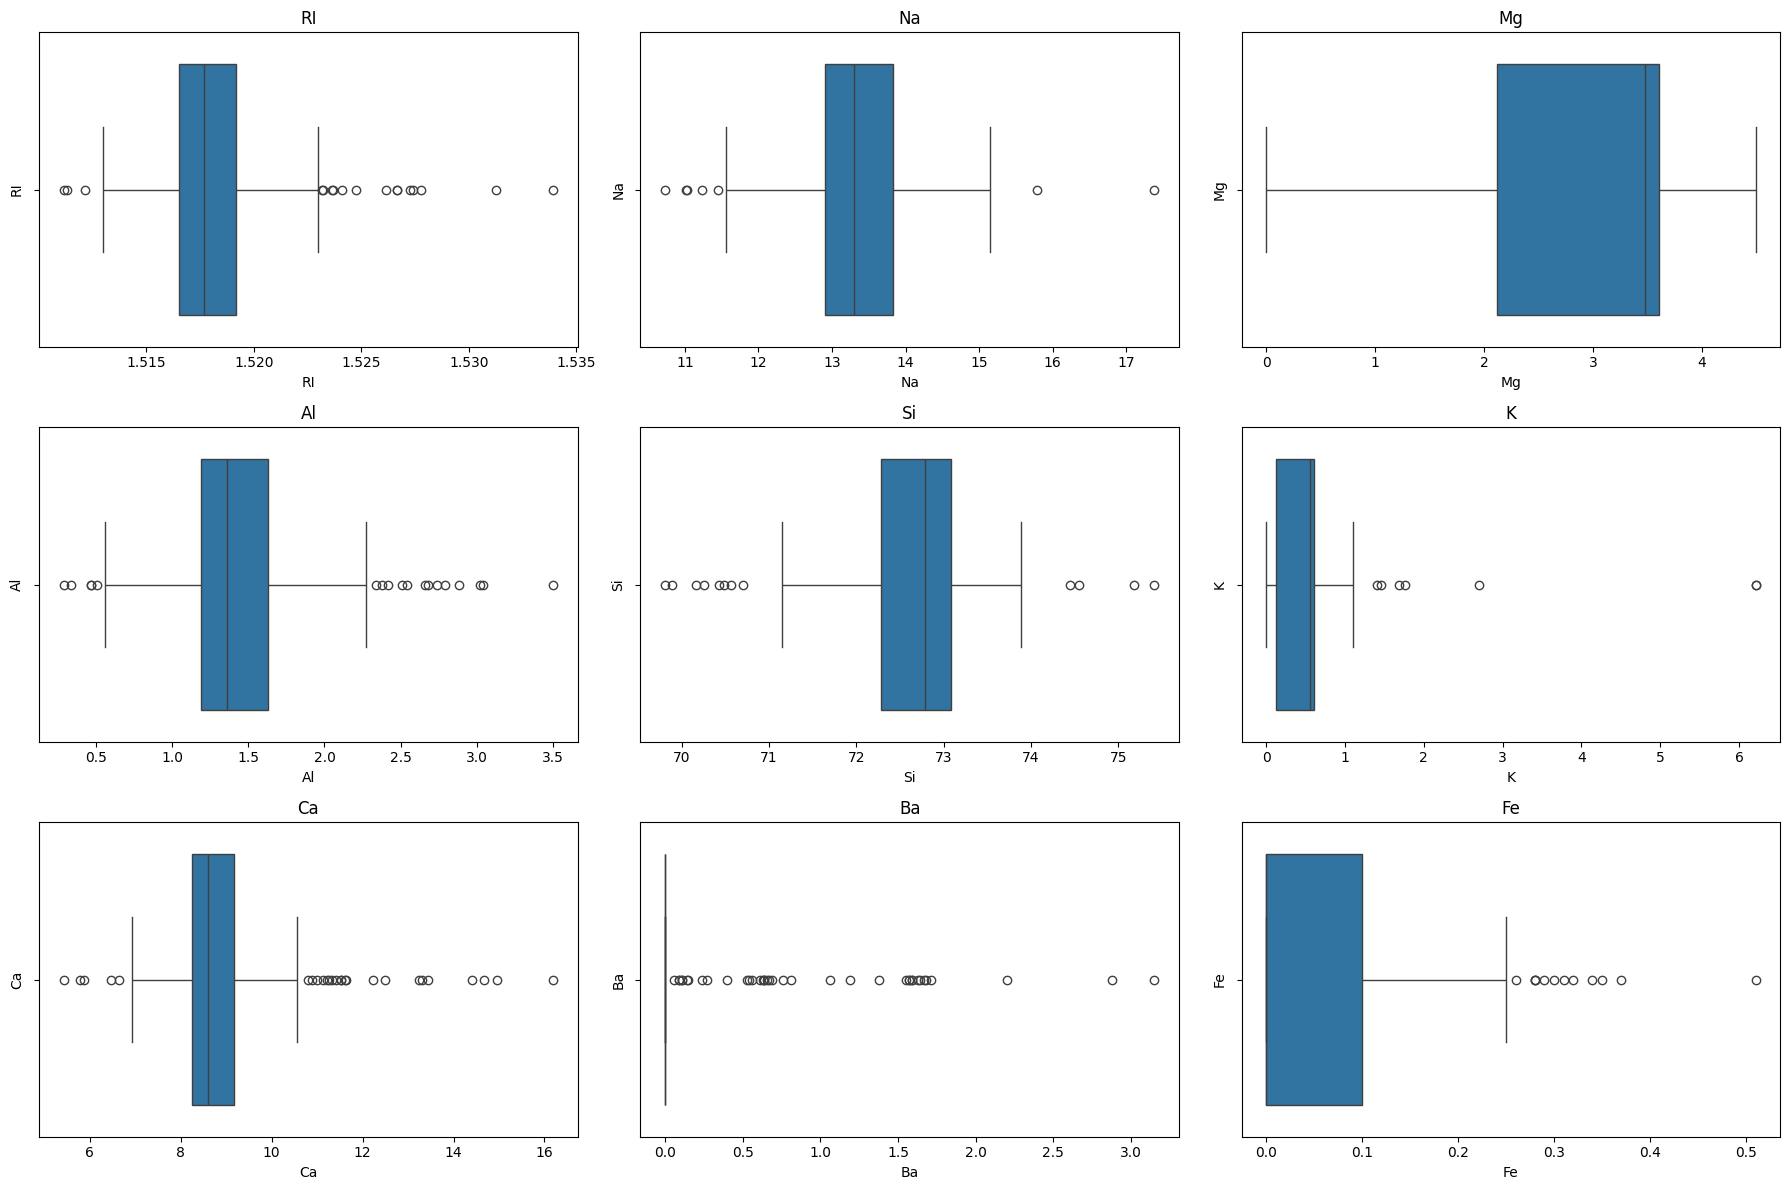

In [395]:
# Set up subplots
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Boxplots for numerical columns
for i, col in enumerate(cols):
    sns.boxplot(x=data[col], ax=axes[(i)//3, (i)%3])
    axes[(i)//3, (i)%3].set_title(f'{col}')
    axes[(i)//3, (i)%3].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

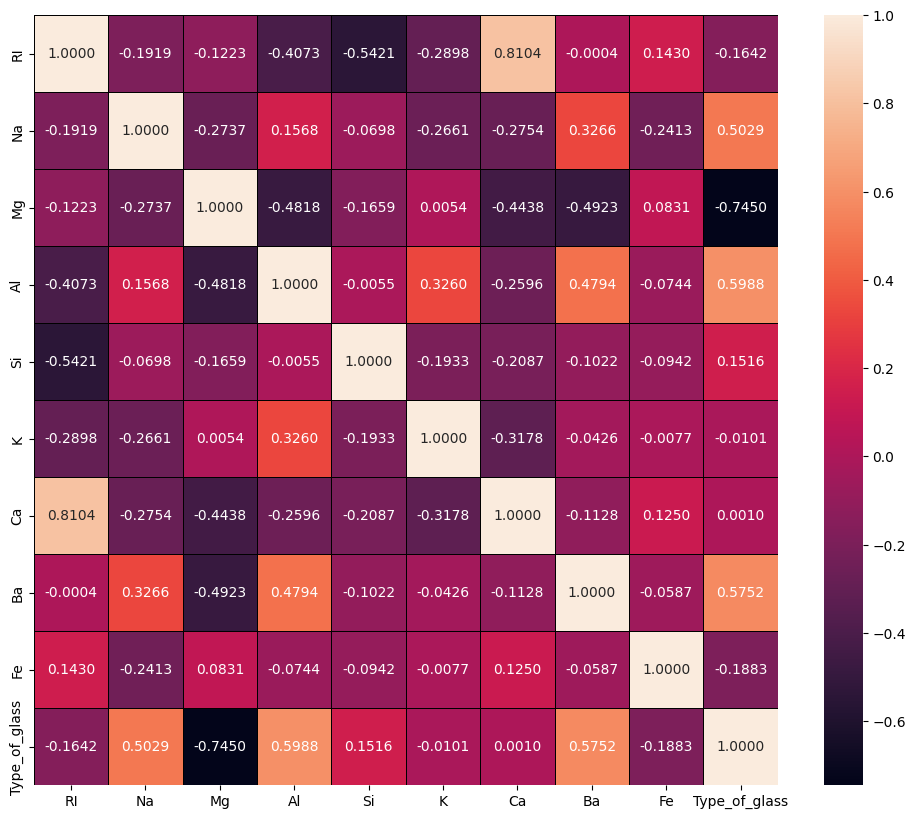

In [396]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
f, axes = plt.subplots(figsize = (12,10))
sns.heatmap(data[cols].corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = axes)
plt.show()

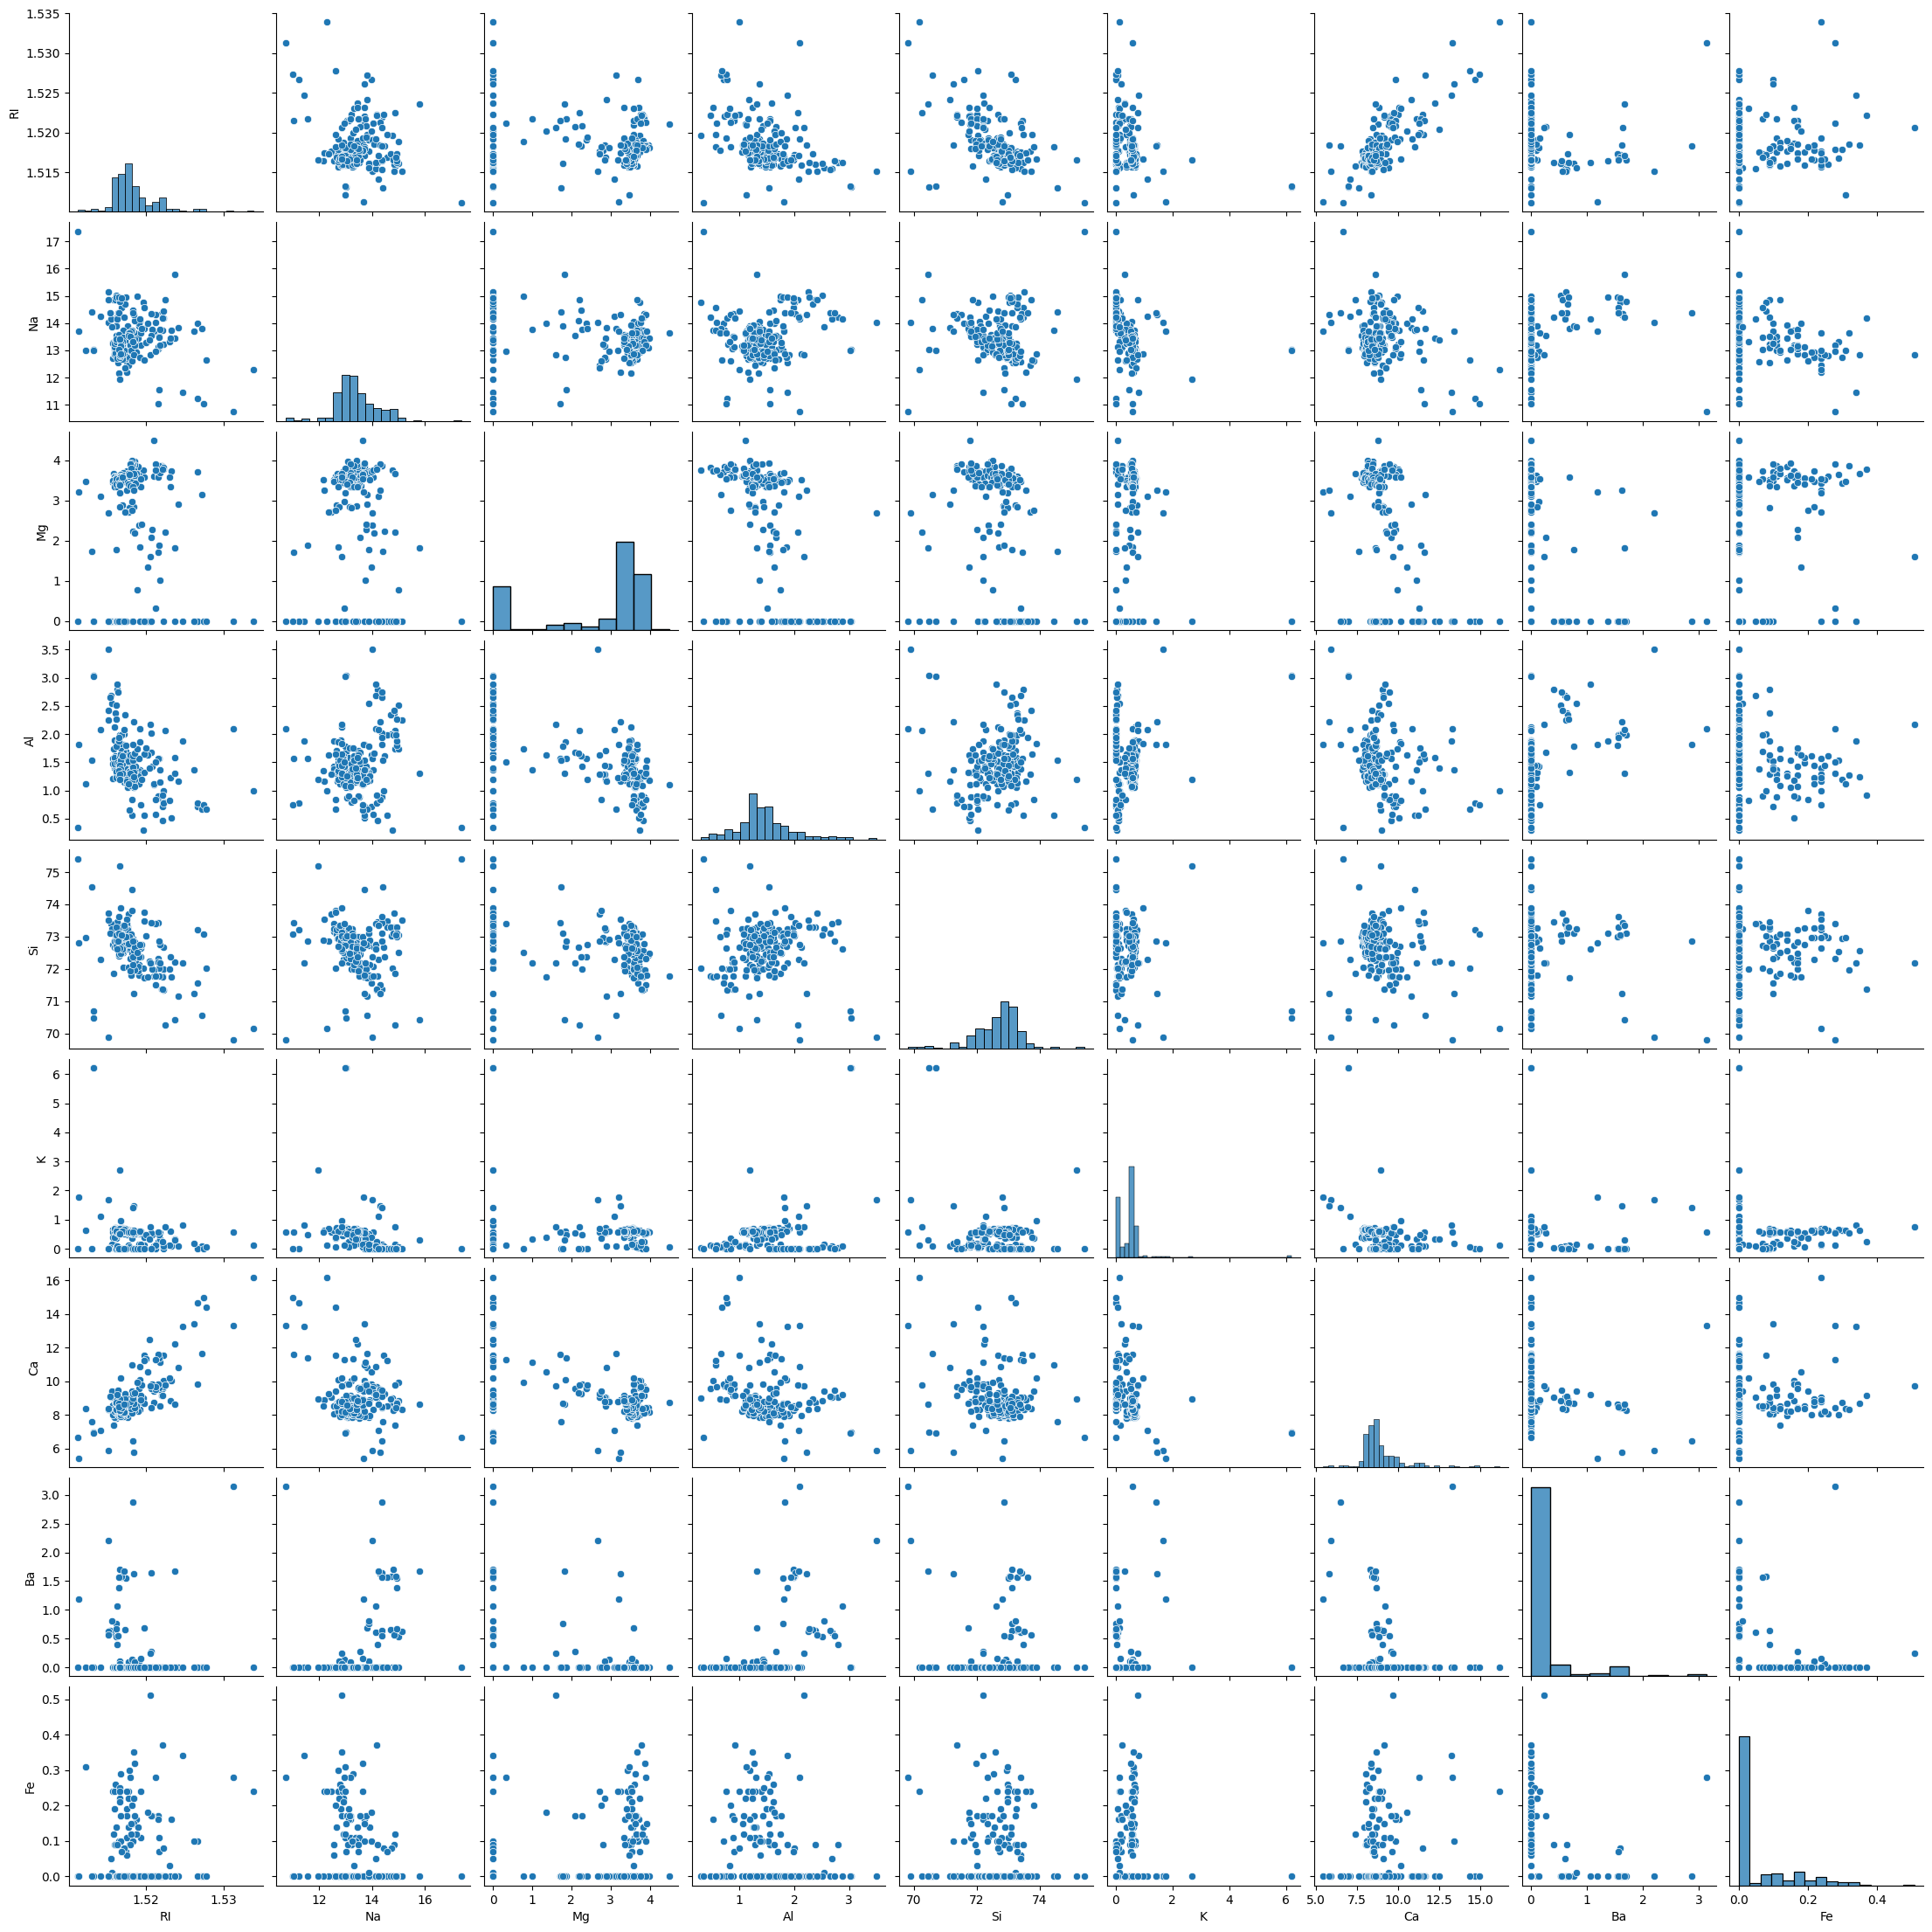

In [397]:
selected_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Create a pair plot
sns.pairplot(data[selected_columns])
plt.show()

# Data processing and model building


In [398]:
Xn = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']] # Without K and Ca
y = data['Type_of_glass']

In [399]:
print(Xn)

          RI     Na    Mg    Al     Si    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.00  0.0
..       ...    ...   ...   ...    ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  1.67  0.0

[214 rows x 7 columns]


In [400]:
scaler = StandardScaler()
X = scaler.fit_transform(Xn)

In [401]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -1.12708201,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ...,  0.10231907,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ...,  0.43878673,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  0.99525248,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ...,  1.2411327 ,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ...,  0.9176061 ,
         3.01367739, -0.5864509 ]])

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

kNN = KNeighborsClassifier(n_neighbors = 13, metric='manhattan', weights='distance')

# Fitting the data
kNN.fit(X_train, y_train)

pred = kNN.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.6822429906542056

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# fit decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
fit = clf.fit(X_train, y_train)

predict = fit.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, predict)
print (cm)
print('')
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))
print('')
print (classification_report(y_test, predict))

[[25  5  3  0  0  2]
 [11 22  6  1  1  1]
 [ 2  3  1  0  0  0]
 [ 0  1  0  6  0  0]
 [ 0  0  0  0  4  1]
 [ 0  0  0  0  0 12]]

[Train/test split] score: 0.65421

              precision    recall  f1-score   support

           1       0.66      0.71      0.68        35
           2       0.71      0.52      0.60        42
           3       0.10      0.17      0.12         6
           5       0.86      0.86      0.86         7
           6       0.80      0.80      0.80         5
           7       0.75      1.00      0.86        12

    accuracy                           0.65       107
   macro avg       0.65      0.68      0.65       107
weighted avg       0.68      0.65      0.66       107

